In [1]:
import numpy as np

from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16

from PIL import Image, ImageOps

from matplotlib import pyplot as plt

In [47]:
np.random.seed(42)

In [90]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=x_test.shape[0])

In [49]:
x_train.shape

(50000, 28, 28)

2


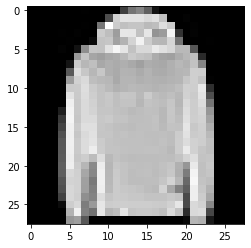

In [50]:
print(y_train[101])
plt.imshow(x_train[101], cmap='gray')

In [51]:
x_train = x_train.reshape(x_train.shape + (1, ) )
x_val = x_val.reshape(x_val.shape + (1, ) )
x_test = x_test.reshape(x_test.shape + (1, ) )

x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [52]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(50000, 10)
(10000, 10)


In [53]:
num_classes = y_train.shape[1]
input_shape = x_train[0].shape
epochs = 20
batch_size = 64

In [31]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape ))
model.add(AveragePooling2D())

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 average_pooling2d_4 (Averag  (None, 13, 13, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [32]:
model.fit(x_train, y_train, validation_split=0.15, batch_size=batch_size, epochs=epochs)

Epoch 1/20
797/797 [==============================] - 26s 32ms/step - loss: 0.5787 - accuracy: 0.7860 - val_loss: 0.4182 - val_accuracy: 0.8440
Epoch 2/20
797/797 [==============================] - 27s 34ms/step - loss: 0.3745 - accuracy: 0.8627 - val_loss: 0.3690 - val_accuracy: 0.8614
Epoch 3/20
797/797 [==============================] - 27s 33ms/step - loss: 0.3179 - accuracy: 0.8832 - val_loss: 0.3116 - val_accuracy: 0.8881
Epoch 4/20
797/797 [==============================] - 26s 33ms/step - loss: 0.2854 - accuracy: 0.8951 - val_loss: 0.2828 - val_accuracy: 0.8950
Epoch 5/20
797/797 [==============================] - 28s 35ms/step - loss: 0.2610 - accuracy: 0.9029 - val_loss: 0.3003 - val_accuracy: 0.8900
Epoch 6/20
797/797 [==============================] - 29s 36ms/step - loss: 0.2420 - accuracy: 0.9105 - val_loss: 0.2553 - val_accuracy: 0.9064
Epoch 7/20
797/797 [==============================] - 28s 35ms/step - loss: 0.2246 - accuracy: 0.9154 - val_loss: 0.2621 - val_accuracy:

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3641 - accuracy: 0.9095


[0.3641086518764496, 0.909500002861023]

In [54]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape ))
model.add(AveragePooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 average_pooling2d_4 (Averag  (None, 13, 13, 64)       0         
 ePooling2D)                                                     
                                                                 
 dropout_8 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 32)         0         
 ePooling2D)                                                     
                                                                 
 dropout_9 (Dropout)         (None, 5, 5, 32)         

In [56]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs)

Epoch 1/20
782/782 [==============================] - 29s 36ms/step - loss: 0.6846 - accuracy: 0.7439 - val_loss: 0.4518 - val_accuracy: 0.8283
Epoch 2/20
782/782 [==============================] - 32s 40ms/step - loss: 0.4566 - accuracy: 0.8307 - val_loss: 0.3861 - val_accuracy: 0.8583
Epoch 3/20
782/782 [==============================] - 31s 40ms/step - loss: 0.3964 - accuracy: 0.8536 - val_loss: 0.3186 - val_accuracy: 0.8829
Epoch 4/20
782/782 [==============================] - 29s 36ms/step - loss: 0.3574 - accuracy: 0.8680 - val_loss: 0.3113 - val_accuracy: 0.8859
Epoch 5/20
782/782 [==============================] - 29s 37ms/step - loss: 0.3321 - accuracy: 0.8778 - val_loss: 0.2934 - val_accuracy: 0.8943
Epoch 6/20
782/782 [==============================] - 30s 39ms/step - loss: 0.3154 - accuracy: 0.8839 - val_loss: 0.2840 - val_accuracy: 0.8946
Epoch 7/20
782/782 [==============================] - 32s 41ms/step - loss: 0.2994 - accuracy: 0.8889 - val_loss: 0.2705 - val_accuracy:

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2451 - accuracy: 0.9123


[0.2450890690088272, 0.9122999906539917]

In [58]:
model.save('../models/saved/model.h5')